In [13]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

# Load prepared dataframes from pickle files
data_path = "../data_processed/"

with open(data_path + "df_prepared.pkl", "rb") as f:
    df = pickle.load(f)

with open(data_path + "merged_df_prepared.pkl", "rb") as f:
    merged_df = pickle.load(f)

print("DataFrames loaded successfully:")
print(f"  df shape: {df.shape}")
print(f"  merged_df shape: {merged_df.shape}")

DataFrames loaded successfully:
  df shape: (65037, 12)
  merged_df shape: (78878, 18)


# Descriptives

# a) KPIs

## KPI 1: Utilization Rate

In [18]:
def calculate_utilizationrate (df, date) :
    possible_session_times = df[df['connectionTime'].dt.date == pd.to_datetime(date).date()]
    possible_session_times = possible_session_times.copy()
    possible_session_times['session_duration'] = (possible_session_times['doneChargingTime'] - possible_session_times['connectionTime']) / pd.Timedelta(hours=1)

    total_stations = len(set(df['stationID']))
    total_available_time = total_stations * 24
    utilized_time_station = possible_session_times.groupby('stationID')['session_duration'].sum()
    utilized_time_station = utilized_time_station.apply(lambda x: min(x, 24))
    total_utilized_time = utilized_time_station.sum()
    utilization_rate = (total_utilized_time / total_available_time) * 100
    return utilization_rate


def calculate_utilizationrate_per_day (df):
    dates = df['connectionTime'].dt.date.unique()
    utilization_rates = []
    for date in dates:
        utilization_rate = calculate_utilizationrate(df, date)
        utilization_rates.append({'date': date, 'utilization_rate': utilization_rate})

    utilization_rates = sorted(utilization_rates, key=lambda x: x['date'])
    return pd.DataFrame(utilization_rates)

daily_utilization_df = calculate_utilizationrate_per_day(df)
daily_utilization_df.set_index('date', inplace=True)
print(daily_utilization_df)



            utilization_rate
date                        
2018-04-25          6.211481
2018-04-26          5.730919
2018-04-27          8.040974
2018-04-28          2.722384
2018-04-29          2.499773
...                      ...
2021-09-09          9.443428
2021-09-10          4.344648
2021-09-11          0.734921
2021-09-12          1.487031
2021-09-13         11.028448

[1125 rows x 1 columns]


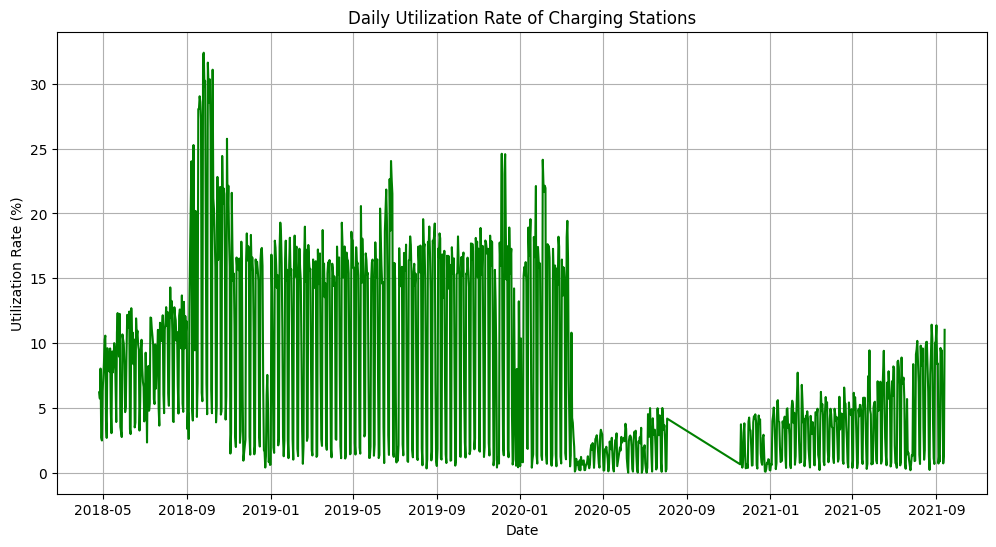

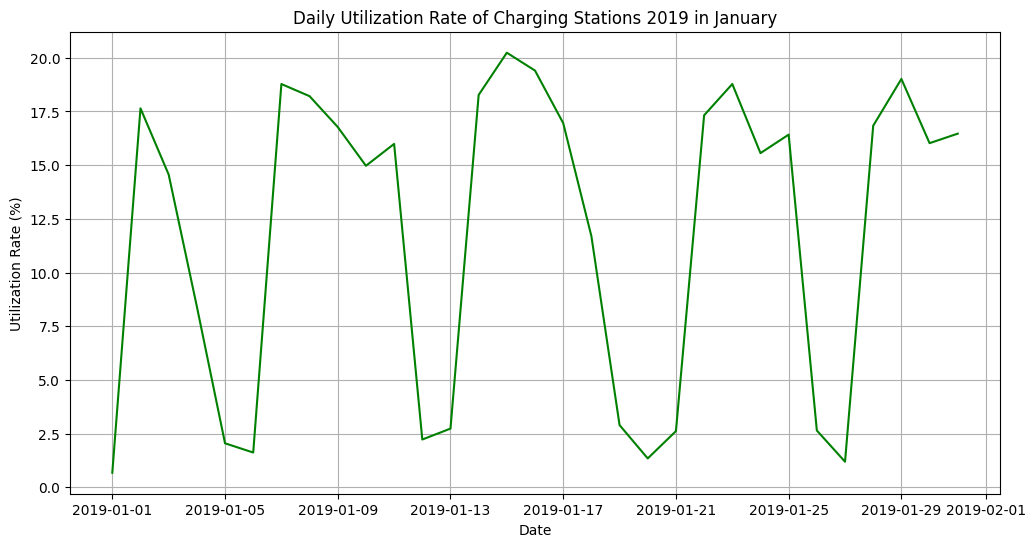

In [19]:
plt.figure(figsize=(12, 6))
daily_utilization_df['utilization_rate'].plot(kind='line', color='green')
plt.title("Daily Utilization Rate of Charging Stations")
plt.xlabel("Date")
plt.ylabel("Utilization Rate (%)")
plt.grid(True)
plt.show()

daily_utilization_2019 = calculate_utilizationrate_per_day(df[(df['connectionTime'].dt.year == 2019) & (df['connectionTime'].dt.month == 1)])
daily_utilization_2019 = pd.DataFrame(daily_utilization_2019)
daily_utilization_2019.set_index('date', inplace=True)

plt.figure(figsize=(12, 6))
daily_utilization_2019['utilization_rate'].plot(kind='line', color='green')
plt.title("Daily Utilization Rate of Charging Stations 2019 in January")
plt.xlabel("Date")
plt.ylabel("Utilization Rate (%)")
plt.grid(True)
plt.show()

## KPI 2: Energy delivered per Hour

# b) Site Characteristics